# Clustering Analysis

### João Vidigal 
------

## 1.1. Cluster Analysis 

Cluster analysis is the process of **partitioning** a set of data objects (or observations) into subsets. Each subset is a cluster, such that objects in a cluster are similar to one another, yet dissimilar to objects in other clusters.
The partitioning is not performed by humans, but by the clustering algorithm. Hence, clustering is useful in that it can lead to the discovery of previously unknown groups within the data. Also known as **unsupervised learning** because the class label information is not present.

Tool to **gain insight** into the distribution of data, to **observe** the characteristics of each cluster, to **focus on a particular set** of clusters for further analysis but also can serve as a **preprocessing step** for other algorithms.

Clustering is known as unsupervised learning because the class label information is not present.
For this reason, clustering is a form of learning by observation,
rather than learning by examples.

**Overview of Basic Clustering Methods**
* **Partitioning Methods**: The simplest and most fundamental version of cluster analysis is partitioning, which organizes the objects of a set into several exclusive groups or clusters. To keep the problem specification concise, we can assume that the number of clusters is given as background knowledge. e.g. k-Means
* **Hierarchical Methods**: works by grouping data objects into a hierarchy or “tree” of clusters.
* **Density-Based Methods**: To find clusters of arbitrary shape, alternatively, we can model clusters as dense regions in the data space, separated by sparse regions. e.g. DBSCAN

## 1.2. Dataset and Tools

The dataset to be analysed is **`AML_ALL_PATIENTS_GENES_LARGE.csv`**. This is a modified version of the widely studied **Leukemia dataset**, originally published by Golub et al. (1999) ["Molecular Classification of Cancer: Class Discovery and Class Prediction by Gene
Expression Monitoring"](http://archive.broadinstitute.org/mpr/publications/projects/Leukemia/Golub_et_al_1999.pdf.) 

**This dataset studies patients with two different types of leukaemia: acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL). The data analyzed here contains the expression levels of 5147 Human genes (features/columns) analyzed in 72 patients (rows): 47 ALL and 25 AML.**

Each row identifies a patient: The first column, `PATIENT_ID`, contains the patients' IDs , the second column, `PATIENT_DIAGNOSIS`, contains the initial diagnosis as performed by clinicians (ground truth), and the remaining 3051 columns contain the expression levels of the 3051 genes analysed.

**The goal is to cluster patients and (ideally) find AML groups and ALL groups.**


## 1.3. Load and Preprocess Dataset


At the end of this step you should have:
* a 72 rows × 5147 columns matrix, **X**, containing the values of the 5147 features for each of the 72 patients.
* a vector, **y**, with the 72 diagnosis, which will be used to train the classifiers.

### 1.3.1. Import libraries

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

from sklearn.cluster import KMeans

from my_functions import *


### 1.3.2. Load data and exploratory data analysis (EDA)

In [3]:
data = pd.read_csv('AML_ALL_PATIENTS_GENES_LARGE.csv')
data.head()

,PATIENT_ID,PATIENT_DIAGNOSIS,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMGAPDH/M33197_5_at,AFFX-HUMGAPDH/M33197_M_at,AFFX-HUMGAPDH/M33197_3_at,...,D64015_at,L10717_at,L78833_cds4_at,M13981_at,M21064_at,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,1,ALL,-0.912181,-0.936280,1.330679,0.045416,0.236442,0.196788,0.244435,2.561725,2.489963,1.794520,-0.029645,-0.528565,-0.203529,...,0.266795,0.343097,0.685649,-0.529272,0.582380,0.428940,1.018678,0.103263,-0.518375,0.019140,0.027771,0.122186,0.593119,-0.391378,-0.161117
1,2,ALL,0.842926,-1.311323,-0.067011,-0.964423,-0.224387,-0.200579,-0.371600,-0.417306,-0.408754,-0.002931,0.698765,0.035392,-0.122523,...,-0.036600,2.472667,-0.342349,-1.342015,-0.747800,-0.425219,-0.474402,-0.067901,0.555431,0.160143,0.003223,-0.043618,0.032103,-0.576990,0.415146
2,3,ALL,1.076941,-0.788133,1.859748,1.151430,0.498175,1.244393,1.390191,0.664072,0.542223,0.548277,2.025297,0.771630,1.078831,...,0.830244,0.725328,1.561351,3.598365,0.224255,2.304741,-0.273350,1.493964,1.747818,-0.568816,0.797680,2.306901,0.705322,-0.331659,-0.261337
3,4,ALL,-1.596222,-0.874097,0.991127,0.574379,-0.065558,-0.044040,-0.402063,0.488835,0.247321,0.266520,-0.055635,-0.456281,-0.240105,...,-0.608718,-0.596098,0.632346,0.210415,0.623308,-0.000930,-0.288936,0.691636,0.548844,-0.552853,-0.342677,-0.653193,-1.336776,-0.496289,-1.514082
4,5,ALL,-0.192137,-0.655253,-0.193356,-0.651854,0.142487,-0.176496,-0.286980,-0.274163,0.379259,-0.311094,-0.100120,0.373027,-0.301228,...,-1.102819,-0.355838,-0.761163,-0.437953,-0.839889,-0.721104,-0.471285,-0.206971,-0.063819,0.325090,-1.183998,0.049037,0.099424,-0.609271,0.139542


In [4]:
data.info() # info about the df (like dtype and memory usage).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Columns: 5149 entries, PATIENT_ID to Z78285_f_at
dtypes: float64(5147), int64(1), object(1)
memory usage: 2.8+ MB


Apart from the patient_id (type: int64) and  patient_diagnosis (type: object) the majority of data(genomic data) is float64 type.

In [5]:
data[['PATIENT_ID','PATIENT_DIAGNOSIS']].groupby('PATIENT_DIAGNOSIS').count()

,PATIENT_ID
PATIENT_DIAGNOSIS,
ALL,47
AML,25


In [6]:
data.isnull().values.any() # check missing data. If False there is none.

False

The data doesn't have any missinga data.

In [7]:
len(data.drop_duplicates()) == len(data) #check for duplicates. If true there are none.

True

Also, not any duplicates.

### 1.3.3. Split the dataset into the input (X) and output variables (Y)

The first thing is to assign X and Y. Data assigned as an X array is what produces decisions encoded in the Y array.

In [8]:
data_df = data.set_index('PATIENT_ID')
X_data, Y_data = data_df.drop('PATIENT_DIAGNOSIS', axis=1).to_numpy(), data_df['PATIENT_DIAGNOSIS'].to_numpy()

### 1.3.3. Visualization of the data with PCA

Much more clear when looking at high-dimensional data with PCA.

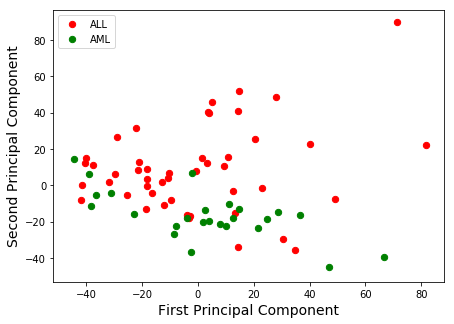

In [9]:
pca_visual(X_data, Y_data, {0:'ALL',1:'AML'})    

## 2. Dimensionality Reduction

The number of features (genes) is extremely high when compared to the number of objects to cluster (patients). In this context, we are going to perform dimensionality reduction, that is, reduce the number of features, in two ways:

* [**Removing features with low variance**](http://scikit-learn.org/stable/modules/feature_selection.html) 

* [**Using Principal Component Analysis**](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

### 2.1. Removing features with low variance

If the variance is zero, it means that the feature is constant and will not improve the performance of the model, that is why it is going to be removed.

In [10]:
sel = VarianceThreshold(threshold=0)
X_variance = sel.fit_transform(X_data)
X_variance.shape

(72, 5147)

Removed just one feature resulting in 5147 total features(genes).

### 2.2. Using Principal Component Analysis

by using PCA on the X_data we can create an artificial feature through a linear combination of the original features. In the end, all the features in the projected dataset are called principal components. For this exercise we are selecting 71 (number of patients - 1) components.  

In [11]:
pca = PCA(n_components=len(X_data)-1) 
pca.fit(X_data)
X_PCA = pca.transform(X_data)      
X_PCA.shape

PCA(copy=True, iterated_power='auto', n_components=71, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

(72, 71)

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Variance (%)')

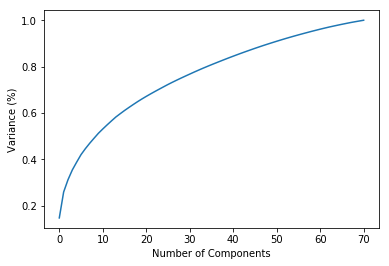

In [12]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.show()

As shown in the previous plot the 71 components preserve almost 100% of the total data variance.

## 3. Clustering Patients using Partitional Clustering

Testing the **`K`-means** to cluster the patients.

**“How does the k-means algorithm work?”** The k-means algorithm defines the centroid of a cluster as the mean value of the points within the cluster. It proceeds as follows. First, it randomly selects k of the objects in D, each of which initially represents a cluster mean or center. For each of the remaining objects, an object is assigned to the cluster to which it is the most similar, based on the Euclidean distance between the object and the cluster mean. The k-means algorithm then iteratively improves the within-cluster variation. For each cluster, it computes the new mean using the objects assigned to the cluster in the previous iteration. All the objects are then reassigned using the updated means as the new cluster centers. The iterations continue until the assignment is stable, that is, the clusters formed in the current round are the same as those formed in the previous round.

In order to evaluate this cluster methodology we are going to test different values of K. For each value of K we are going to present the clustering by specifying how many patients ALL and AML are in each cluster but also the [Silhouette score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) to access the best K.

Finally we are going to compare the data from the three datasets (original data, after removing features with low variance and after applying PCA)

### 3.1 Cluster the original data

In [13]:
#Calculate the Silhouette score and how many patients originally with ALL and AML are in each cluster.
df_k_or, df_clus_sis, df_clus_acc = cluster(X_data, Y_data)

For n_clusters = 2 The average silhouette_score is : 0.1196273422807807

 class predict :  32.0 %


 class predict : 
           ALL  AML
clusters          
0          10   12
1          37   13 

For n_clusters = 3 The average silhouette_score is : 0.08533901103409998

 class predict :  49.0 %


 class predict : 
           ALL  AML
clusters          
0          17    1
1           4   18
2          26    6 

For n_clusters = 4 The average silhouette_score is : 0.029093075040779848

 class predict :  46.0 %


 class predict : 
           ALL  AML
clusters          
0          17    6
1           4   16
2          10    0
3          16    3 

For n_clusters = 5 The average silhouette_score is : 0.07191240509706927

 class predict :  26.0 %


 class predict : 
           ALL  AML
clusters          
0          18    1
1           4    1
2           0   16
3           1    0
4          24    7 

For n_clusters = 6 The average silhouette_score is : 0.0410742740141122

 class predict :  33.

### 3.2 Cluster the low variance data

In [14]:
df_k_var, df_clus_sis, df_clus_acc  = cluster(X_variance, Y_data, data='var')

For n_clusters = 2 The average silhouette_score is : 0.1196273422807807

 class predict :  32.0 %


 class predict : 
           ALL  AML
clusters          
0          10   12
1          37   13 

For n_clusters = 3 The average silhouette_score is : 0.08533901103409998

 class predict :  49.0 %


 class predict : 
           ALL  AML
clusters          
0          17    1
1           4   18
2          26    6 

For n_clusters = 4 The average silhouette_score is : 0.029093075040779848

 class predict :  46.0 %


 class predict : 
           ALL  AML
clusters          
0          17    6
1           4   16
2          10    0
3          16    3 

For n_clusters = 5 The average silhouette_score is : 0.07191240509706927

 class predict :  26.0 %


 class predict : 
           ALL  AML
clusters          
0          18    1
1           4    1
2           0   16
3           1    0
4          24    7 

For n_clusters = 6 The average silhouette_score is : 0.0410742740141122

 class predict :  33.

### 3.3 Cluster the PCA data

In [15]:
df_k_pca, df_clus_sis, df_clus_acc  = cluster(X_PCA, Y_data, data='pca')

For n_clusters = 2 The average silhouette_score is : 0.1196273422807807

 class predict :  32.0 %


 class predict : 
           ALL  AML
clusters          
0          10   12
1          37   13 

For n_clusters = 3 The average silhouette_score is : 0.08533901103409999

 class predict :  49.0 %


 class predict : 
           ALL  AML
clusters          
0          17    1
1           4   18
2          26    6 

For n_clusters = 4 The average silhouette_score is : 0.029093075040779817

 class predict :  46.0 %


 class predict : 
           ALL  AML
clusters          
0          17    6
1           4   16
2          10    0
3          16    3 

For n_clusters = 5 The average silhouette_score is : 0.07191240509706935

 class predict :  26.0 %


 class predict : 
           ALL  AML
clusters          
0          18    1
1           4    1
2           0   16
3           1    0
4          24    7 

For n_clusters = 6 The average silhouette_score is : 0.041074274014112205

 class predict :  3

**Comparison between original data and data that suffered some sort of dimensionality reduction with different clusters**

In [16]:
dfs_k = pd.concat([df_k_or, df_k_var, df_k_pca], axis=1)
dfs_k

,K-means_orig,K-means_var,K-means_pca
2,0.119627,0.119627,0.119627
3,0.085339,0.085339,0.085339
4,0.029093,0.029093,0.029093
5,0.071912,0.071912,0.071912
6,0.041074,0.041074,0.041074


[Text(0, 0.5, 'Silhouette score'), Text(0.5, 0, 'Nº Clusters')]

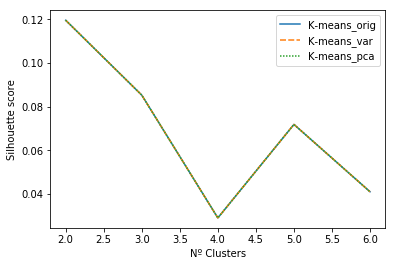

In [17]:
ax= sns.lineplot(data=dfs_k)
ax.set(xlabel='Nº Clusters', ylabel='Silhouette score')

**If we have ground truth we can compare the original data with the clustered data**

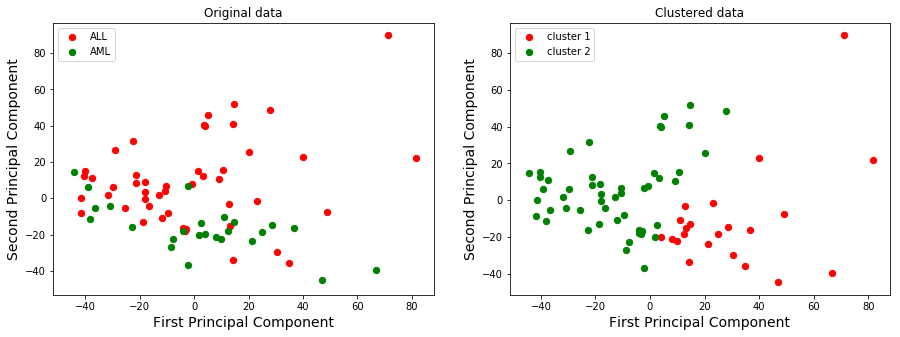

In [18]:
pca_visual(X_data, Y_data,{0:'ALL',1:'AML'}, True, df_clus_sis['clusters'])

### 3.4. Discussion

Since, principal components analysis (transform or project the original data onto a smaller space) and attribute subset selection based on variance  (removes irrelevant, weakly relevant, or redundant attributes) retain the original information from the original dataset but with less space we didn't have any difference between datasets when doing k-means. Probably due to the fact that the distances between all points stay exactly the same.

Best performance was obtained for 2 clusters in every dataset with values of 0.119627, which makes sense because the dataset is based on two classes.

The data also shows that the performance of this algorithm is directly inverse with the increase in the number of clusters, with the exception of 5 clusters, again makes sense for what I've said before.

Although, the best performance was with 2 clusters, we see an improved resolution of the two classes with 3 clusters. 

k-means continues to be one of the simplest and most used clustering algorithms. However, it fails in terms of performance if the initial parameters are not correct (like the number of clusters) or if there is a lot of noise in the data.

## 4. Clustering Patients using Hierarchical Clustering


Using **Hierarchical Clustering Algorithm (HCA)** to cluster the patients. 

**A hierarchical method** creates a hierarchical decomposition of the given set of data objects. The method can be classified as being either agglomerative (bottom-up) or divisive (top-down), based on how the hierarchical decomposition is formed.

### 4.1. Cluster the data in PCA

In [19]:
df_h_pca, df_clus_sis, df_clus_acc = cluster(X_PCA, Y_data, cluster_type='Hierarchical',  data='pca')

Linkage parameter = single 

For n_clusters = 2 The average silhouette_score is : 0.29777744339223516

 class predict :  64.0 %


 class predict : 
           ALL  AML
clusters          
0          46   25
1           1    0 

For n_clusters = 3 The average silhouette_score is : 0.28604265271366813

 class predict :  64.0 %


 class predict : 
           ALL  AML
clusters          
0          46   24
1           1    0
2           0    1 

For n_clusters = 4 The average silhouette_score is : 0.2871001347963654

 class predict :  62.0 %


 class predict : 
           ALL  AML
clusters          
0          45   24
1           1    0
2           0    1
3           1    0 

For n_clusters = 5 The average silhouette_score is : 0.1827089063470052

 class predict :  64.0 %


 class predict : 
           ALL  AML
clusters          
0          45   23
1           0    1
2           0    1
3           1    0
4           1    0 

For n_clusters = 6 The average silhouette_score is : 0.098115210509

**Comparison between differnt types of linkages and clusters in the silloutte score**

[Text(0, 0.5, 'Silhouette score'), Text(0.5, 0, 'Nº Clusters')]

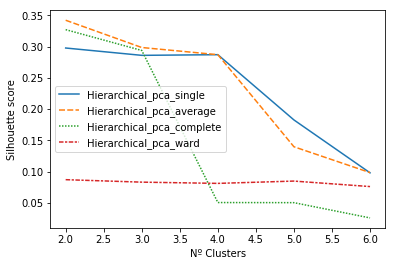

In [20]:
ax = sns.lineplot(data=df_h_pca)
ax.set(xlabel='Nº Clusters', ylabel='Silhouette score')

**If we have ground truth we can compare the original data with the clustered data**

for the best Silhouette score

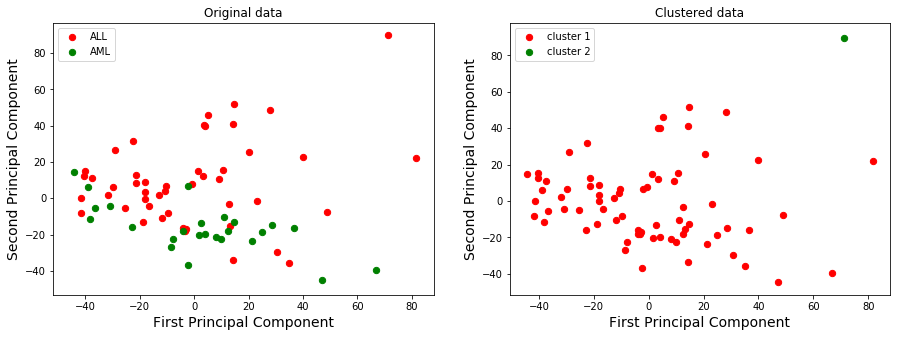

In [21]:
pca_visual(X_data, Y_data,{0:'ALL',1:'AML'}, True, df_clus_sis['clusters'])

for the best accuracy score

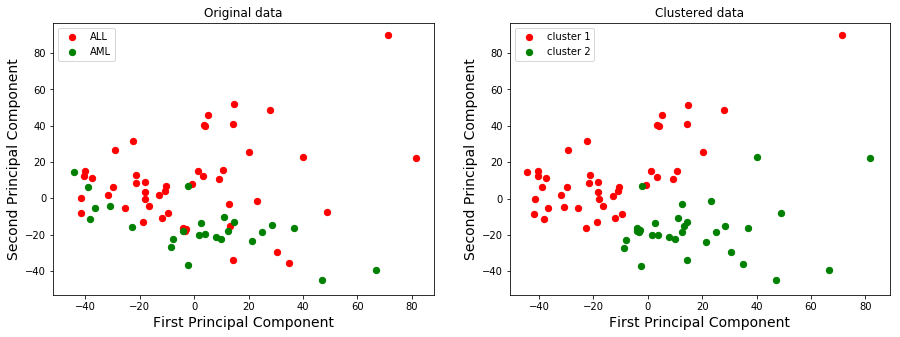

In [22]:
pca_visual(X_data, Y_data,{0:'ALL',1:'AML'}, True, df_clus_acc['clusters'])

### Discussion 

HC algorithm is one of the earliest clustering algorithms used in clustering genes.

Due to the same reasons already mentioned the best cluster performances are again with 2 clusters. Regarding the best silloutte result, the best is the linkage type average with 2 clusters with values of 0.342195 in Silhouette score. However, when plotting the data we can see that the patients are only in the majority class of cancer. 

The best resolution of the two types of cancer was obtained with the ward method and 2 clusters as we can see by the figures above. It predicts with 75.0 % the type of cancer.